# Problem Statement
- A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
- **Approach** - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis. 

In [1]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Dataset
cmpny=pd.read_csv("Company_Data (1).csv")
cmpny

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
# EDA
cmpny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
cmpny.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
cmpny.nunique()

Sales          336
CompPrice       73
Income          98
Advertising     28
Population     275
Price          101
ShelveLoc        3
Age             56
Education        9
Urban            2
US               2
dtype: int64

In [6]:
print(cmpny["ShelveLoc"].unique())
print(cmpny["Urban"].unique())
print(cmpny["US"].unique())

['Bad' 'Good' 'Medium']
['Yes' 'No']
['Yes' 'No']


In [7]:
cmpny.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

## Label Encoding

In [8]:
label_encoder = LabelEncoder()
cmpny['ShelveLoc']= label_encoder.fit_transform(cmpny['ShelveLoc']) 
cmpny['Urban']= label_encoder.fit_transform(cmpny['Urban'])
cmpny['US']= label_encoder.fit_transform(cmpny['US'])

In [9]:
cmpny['Sales'].mean()

7.496325

In [10]:
cmpny['High']=cmpny.Sales.map(lambda x: 1 if x >7.49 else 0)

In [11]:
cmpny.drop('Sales',inplace=True,axis=1)

In [12]:
cmpny.rename(columns={'High':'Sales'},inplace=True)

In [13]:
cmpny.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


In [14]:
cmpny.dtypes

CompPrice      int64
Income         int64
Advertising    int64
Population     int64
Price          int64
ShelveLoc      int32
Age            int64
Education      int64
Urban          int32
US             int32
Sales          int64
dtype: object

In [15]:
list(cmpny.columns)

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'Sales']

In [16]:
cmpny['ShelveLoc'].value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [17]:
cmpny['Urban'].value_counts()

1    282
0    118
Name: Urban, dtype: int64

In [18]:
cmpny['US'].value_counts()

1    258
0    142
Name: US, dtype: int64

In [19]:
#groupby
cmpny.groupby(['ShelveLoc','Urban','US']).count()

CompPrice  Income  Advertising  Population  Price  Age  \
ShelveLoc Urban US                                                           
0         0     0          11      11           11          11     11   11   
                1          11      11           11          11     11   11   
          1     0          23      23           23          23     23   23   
                1          51      51           51          51     51   51   
1         0     0           6       6            6           6      6    6   
                1          22      22           22          22     22   22   
          1     0          18      18           18          18     18   18   
                1          39      39           39          39     39   39   
2         0     0          29      29           29          29     29   29   
                1          39      39           39          39     39   39   
          1     0          55      55           55          55     55   55   
                1          96      96           96          96     96   96   

                    Education  Sales  
ShelveLoc Urban US                    
0         0     0          11     11  
                1          11     11  
          1     0          23     23  
                1          51     51  
1         0     0           6      6  
                1          22     22  
          1     0          18     18  
                1          39     39  
2         0     0          29     29  
                1          39     39  
          1     0          55     55  
                1          96     96

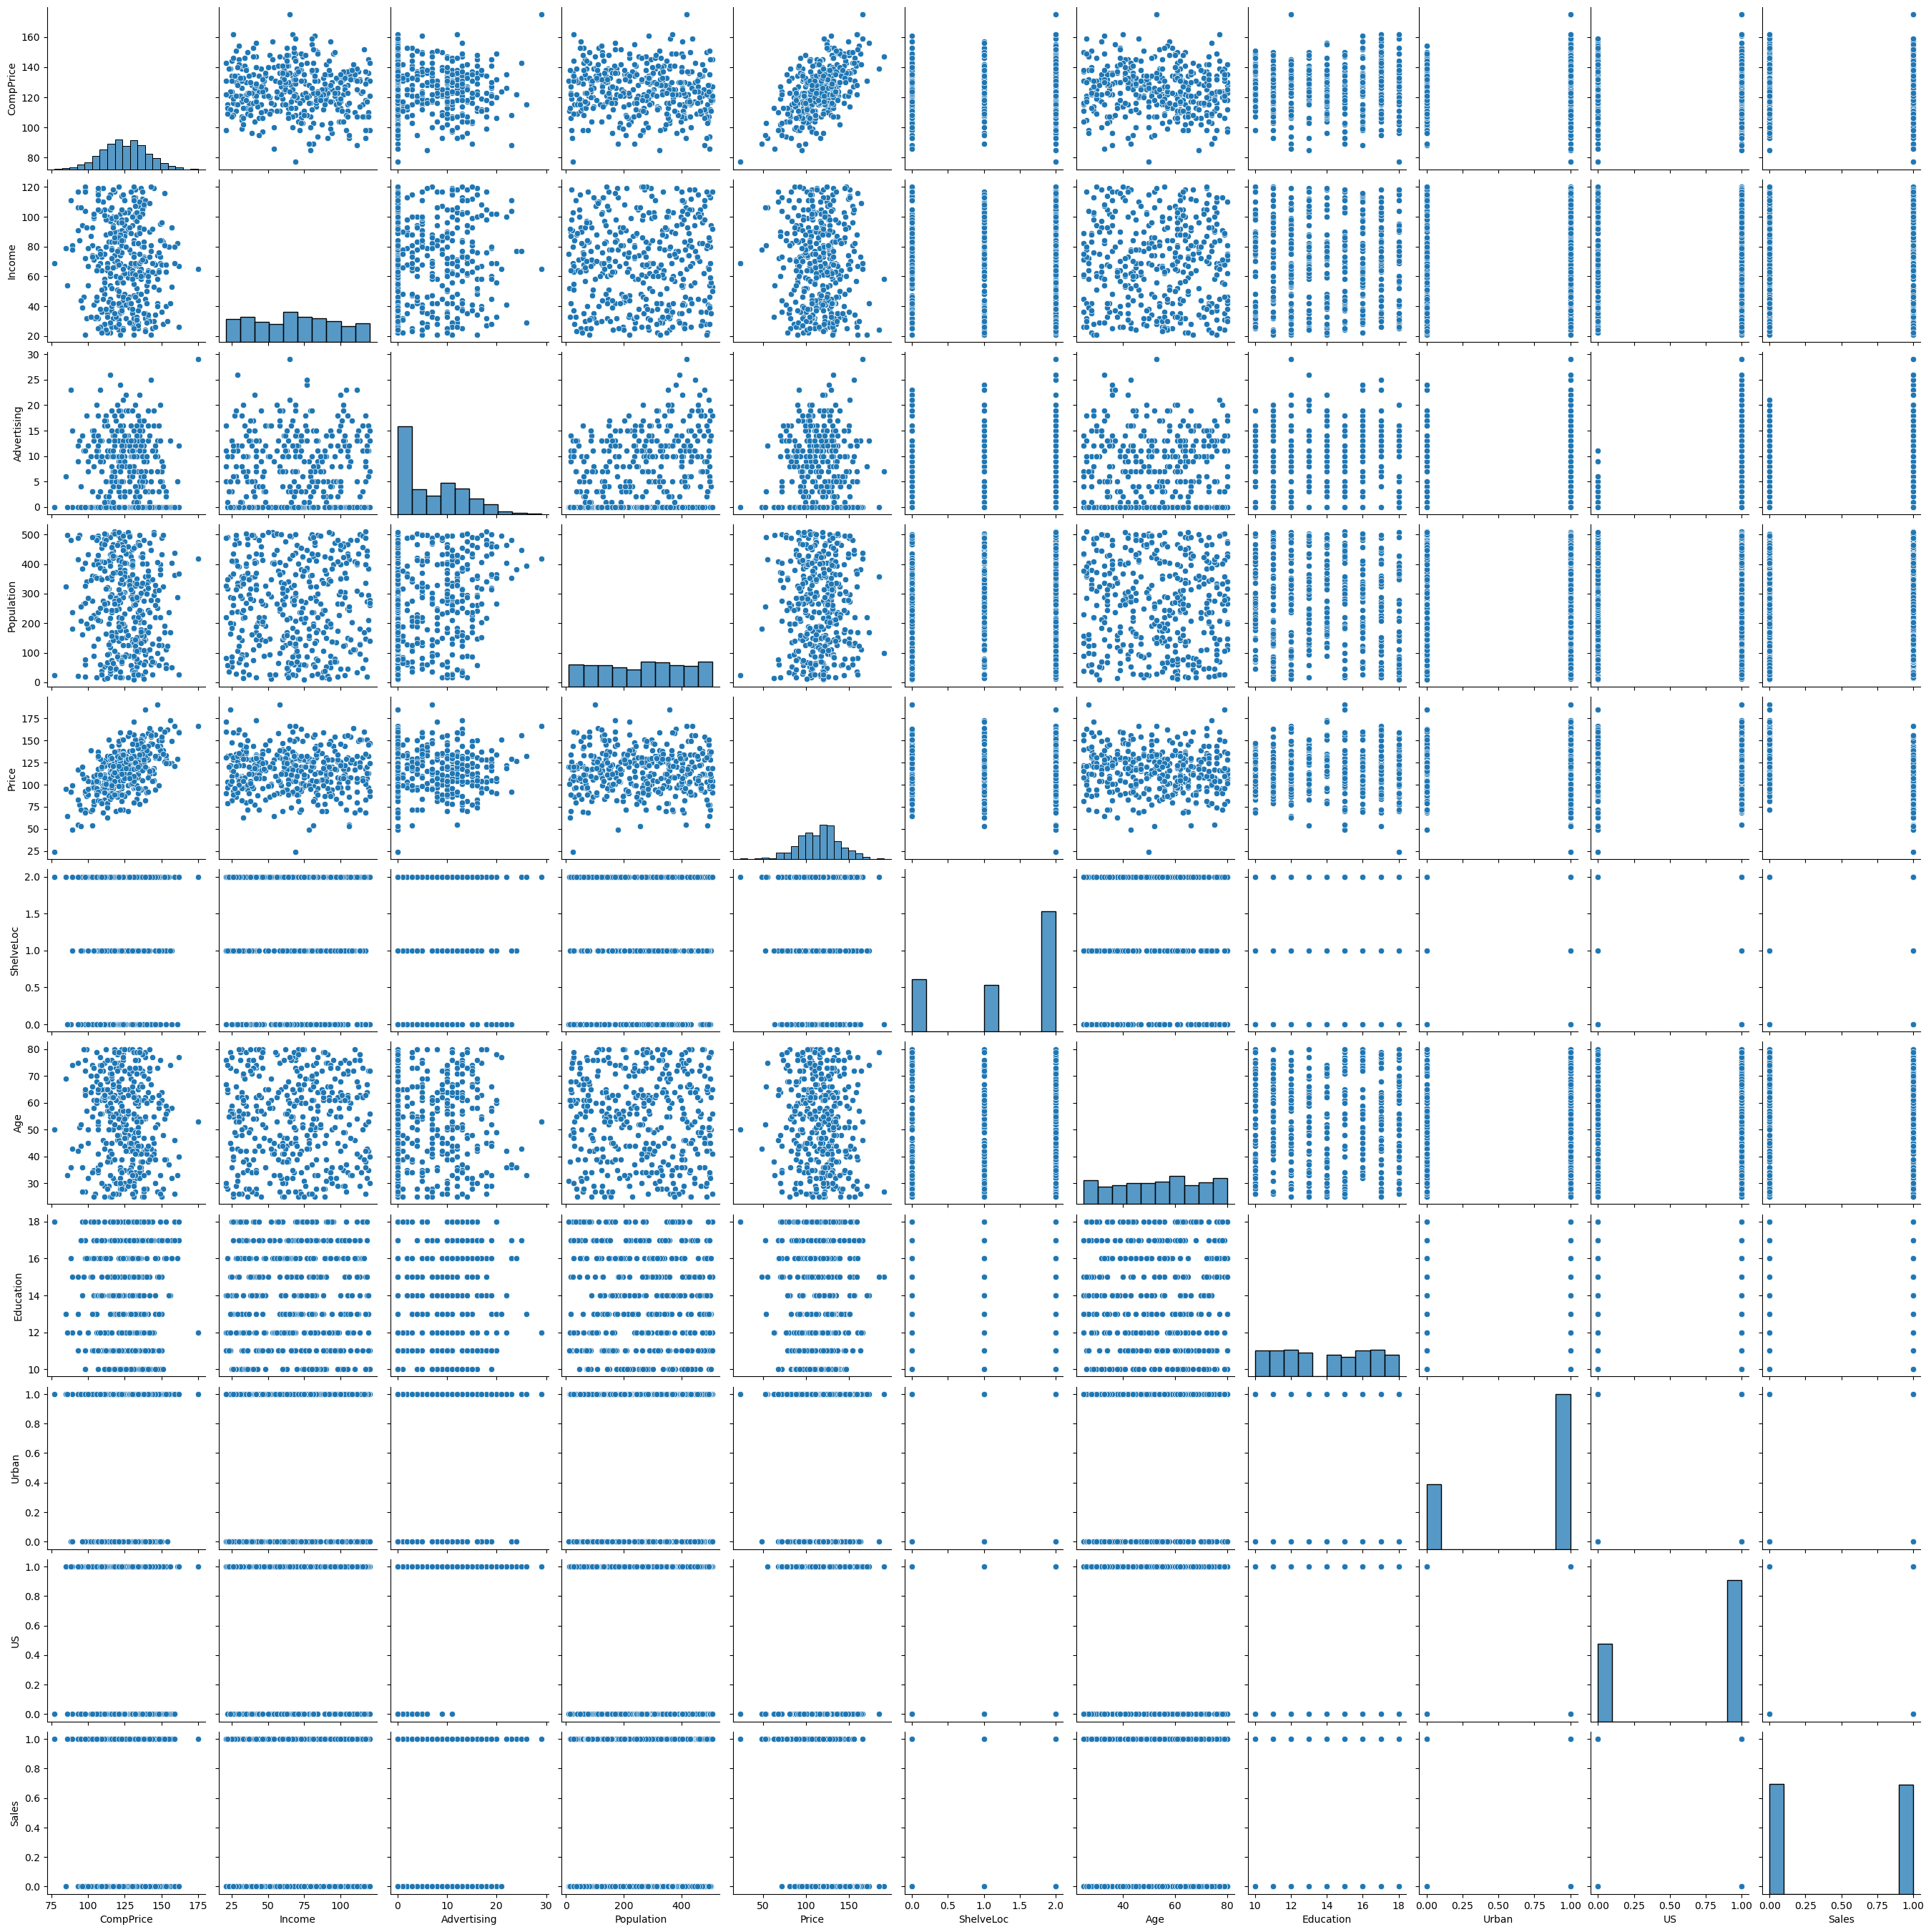

In [20]:
# Visualization
sns.pairplot(cmpny)

In [21]:
cmpny.corr()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869,0.035578
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601,0.123460
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460,0.251910
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564,0.069327
Price,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861,-0.392275
ShelveLoc,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760,0.106962
Age,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652,-0.186707
Education,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250,-0.028847
Urban,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085,-0.047090
US,0.016869,0.089601,0.684460,0.060564,0.057861,-0.039760,0.008652,-0.078250,0.047085,1.000000,0.142579


<Axes: >

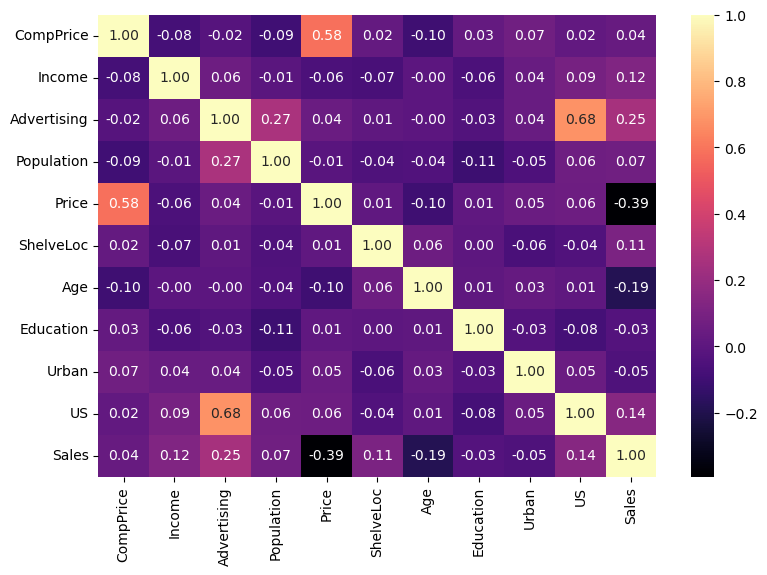

In [22]:
plt.figure(figsize = (9,6));
sns.heatmap(cmpny.corr(), cmap='magma', annot=True, fmt=".2f")

<Axes: >

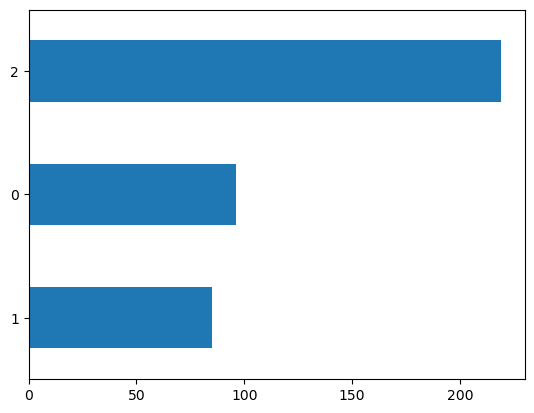

In [23]:
# 0>>Bad,1>>>Good,2>>>Medium
cmpny["ShelveLoc"].value_counts(ascending=True).plot(kind='barh')

In [24]:
# Dependent Variable : y
# Independent Variable : x

In [25]:
x = cmpny.iloc[:,:-1]
y = cmpny['Sales']

In [26]:
y.head(10)

0    1
1    1
2    1
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: Sales, dtype: int64

In [27]:
# Train-Test Split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=21)

In [28]:
xtrain

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
145,144,63,11,27,117,2,47,17,1,1
216,141,33,0,243,144,2,34,17,1,0
377,132,61,0,263,125,2,41,12,0,0
176,138,107,9,480,154,2,47,11,0,1
91,97,46,11,267,107,2,80,15,1,1
...,...,...,...,...,...,...,...,...,...,...
368,109,22,10,348,79,1,74,14,0,1
48,116,52,0,349,98,0,69,18,1,0
260,129,117,8,400,101,0,36,10,1,1
312,137,117,5,337,135,0,38,10,1,1


In [29]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(300, 10) (100, 10) (300,) (100,)


In [30]:
model=RandomForestClassifier()

In [31]:
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [32]:
ypred=model.predict(xtest)

In [33]:
from sklearn.metrics import roc_curve,auc
FPR,TPR,thresholds =roc_curve(ytest,ypred)
roc_auc=auc(FPR,TPR)
roc_auc

0.8066502463054187

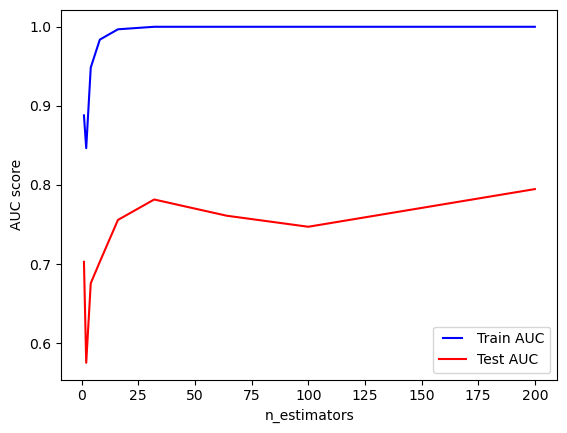

In [34]:
n_estimators=[1,2,4,8,16,32,64,100,200]
train_result=[]
test_result=[]

for estimator in n_estimators:
    model = RandomForestClassifier(n_estimators=estimator,n_jobs=-1)
    model.fit(xtrain,ytrain)
    train_pred=model.predict(xtrain)
    FPR,TPR,thresolds=roc_curve(ytrain,train_pred)
    roc_auc= auc(FPR,TPR)
    train_result.append(roc_auc)
    test_pred=model.predict(xtest)
    FPR,TPR,thresolds=roc_curve(ytest,test_pred)
    roc_auc=auc(FPR,TPR)
    test_result.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1,=plt.plot(n_estimators,train_result,'b',label='Train AUC')
line2,=plt.plot(n_estimators,test_result,'r',label='Test AUC')
plt.legend(handler_map={line1:HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [35]:
## Hyperparameter Tunning
parameter={
 'criterion':['entropy','gini'],
    'n_estimators':[1,2,4,8,16,25,26,27,28,29,30,31,32],
    'max_depth':[1,2,3,4,5,6,7],
    
}


In [36]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(RandomForestClassifier(), param_grid=parameter)

In [37]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'n_estimators': [1, 2, 4, 8, 16, 25, 26, 27, 28, 29,
                                          30, 31, 32]})

In [38]:
ypred=grid.predict(xtest)

In [39]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 27}

In [183]:
# Build the model
model=RandomForestClassifier(criterion='entropy',n_estimators=27,random_state=14,max_depth=6)

In [184]:
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        58
           1       0.83      0.81      0.82        42

    accuracy                           0.85       100
   macro avg       0.85      0.84      0.85       100
weighted avg       0.85      0.85      0.85       100



In [185]:
print("Training Accuracy:", model.score(xtrain,ytrain))
print("Testing Accuracy:" ,model.score(xtest,ytest))

Training Accuracy: 0.9666666666666667
Testing Accuracy: 0.85


In [186]:
#Training Model Evaluation

In [187]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [188]:
# Training r-sq
print("training r-sq is: %.2f"% model.score(xtrain,ytrain))

training r-sq is: 0.97


In [189]:
# Prediction on traing dataset
ytrainpred=model.predict(xtrain)

In [190]:
# The MAE
print("The MAE is : %.2f"% mean_absolute_error(ytrain,ytrainpred))

The MAE is : 0.03


In [191]:
# The MSE
print("The MSE is : %.2f"% mean_squared_error(ytrain,ytrainpred))

The MSE is : 0.03


In [192]:
# The RMSE
print("The RMSE is : %.2f"% np.sqrt(mean_squared_error(ytrain,ytrainpred)))

The RMSE is : 0.18


In [193]:
# The EVS
print("The EVS is : %.2f"% explained_variance_score(ytrain,ytrainpred))

The EVS is : 0.87


In [194]:
# Prediction on Testing Dataset
ytestpred=model.predict(xtest)

In [195]:
print(ytestpred[:10])

[0 0 0 0 0 0 1 0 1 0]


In [196]:
# The testing coef.of determination
print("The testing r-sq is : %.2f"% r2_score(ytest,ytestpred))

The testing r-sq is : 0.38


In [197]:
# The metrics
print("The MAE is : %.2f"% mean_absolute_error(ytest,ytestpred))

The MAE is : 0.15


In [198]:
# The MSE 
print("The MSE is : %.2f"% mean_squared_error(ytest,ytestpred))

The MSE is : 0.15


In [199]:
# The RMSE
print("The RMSE is : %.2f"% np.sqrt(mean_squared_error(ytest,ytestpred)))

The RMSE is : 0.39


In [200]:
# The EVS
print("The EVS is : %.2f"% explained_variance_score(ytest,ytestpred))

The EVS is : 0.38


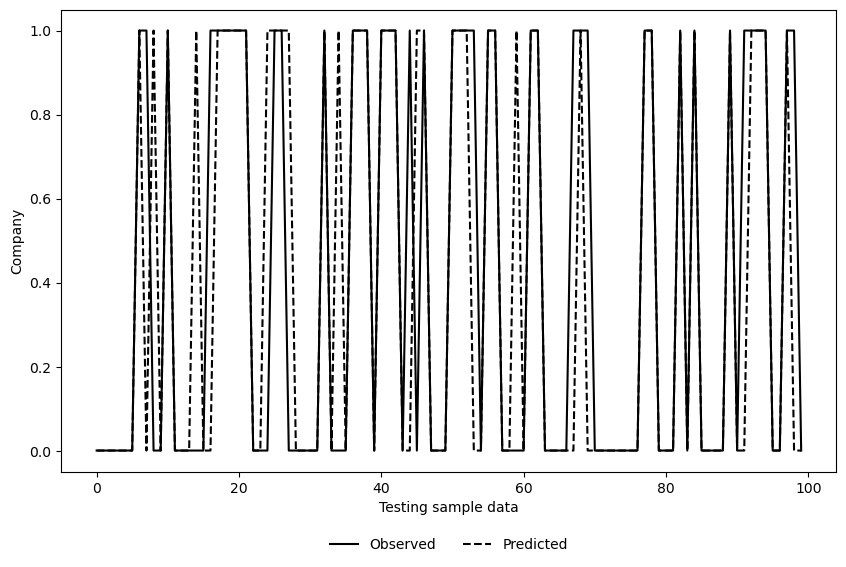

In [201]:
# Plotting the Observed and Predicted Data
plt.rcParams["figure.figsize"]=(10,6)
x_ax=range(len(xtest))
# Plotting
plt.plot(x_ax,ytest,label="Observed", color= "k",linestyle= "-")
plt.plot(x_ax,ytestpred,label="Predicted",color="k",linestyle="--")
plt.ylabel("Company")
plt.xlabel("Testing sample data")
plt.legend(bbox_to_anchor=(0.5,-0.2),loc='lower center',ncol=2,frameon=False)
plt.show()

In [202]:
# The KFold CV
# Training Model CV
score_train=cross_val_score(model,xtrain,ytrain,scoring='neg_mean_squared_error',cv=10)

In [203]:
score_train

array([-0.13333333, -0.23333333, -0.1       , -0.06666667, -0.2       ,
       -0.36666667, -0.2       , -0.1       , -0.3       , -0.3       ])

In [204]:
# The Absolute Mean Score
from numpy import absolute
print(absolute(np.mean(score_train)))

0.2


In [205]:
# The Testing Model CV
score_test=cross_val_score(model,xtest,ytest,scoring='neg_mean_squared_error',cv=10)

In [206]:
score_test

array([-0.2, -0.4, -0.5, -0.5, -0.2, -0.2, -0.4, -0.1, -0.2, -0.4])

In [207]:
print(absolute(np.mean(score_test)))

0.31


In [208]:
# Random Forest Feature Ranking
from sklearn.pipeline import Pipeline

In [209]:
f_list=list(x.columns)
f_importance=pd.Series(model.feature_importances_ , index=f_list).sort_values(ascending=False)

In [210]:
print(f_importance)

Price          0.279909
ShelveLoc      0.136035
CompPrice      0.118806
Age            0.111898
Advertising    0.108336
Income         0.106378
Population     0.065539
Education      0.043920
Urban          0.021195
US             0.007984
dtype: float64
